In [33]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from sklearn.datasets import make_classification
from sklearn.pipeline import make_pipeline
import tensorflow as tf


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from yellowbrick.classifier import ClassPredictionError


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Heart_Disease_Prediction.csv'):
    for filename in filenames:
            print(os.path.join(dirname, filename))

In [4]:
health_data = pd.read_csv('/content/drive/MyDrive/Heart_Disease_Prediction.csv')

In [7]:

health_data.shape

(270, 15)

In [6]:
health_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    270 non-null    int64  
 1   Age                      270 non-null    int64  
 2   Sex                      270 non-null    int64  
 3   Chest pain type          270 non-null    int64  
 4   BP                       270 non-null    int64  
 5   Cholesterol              270 non-null    int64  
 6   FBS over 120             270 non-null    int64  
 7   EKG results              270 non-null    int64  
 8   Max HR                   270 non-null    int64  
 9   Exercise angina          270 non-null    int64  
 10  ST depression            270 non-null    float64
 11  Slope of ST              270 non-null    int64  
 12  Number of vessels fluro  270 non-null    int64  
 13  Thallium                 270 non-null    int64  
 14  Heart Disease            2

In [8]:
health_data.head()

,index,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [9]:
health_data['Heart Disease']=health_data['Heart Disease'].replace({'Presence':1, 'Absence':0})

print(health_data)

     index  Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  \
0        0   70    1                4  130          322             0   
1        1   67    0                3  115          564             0   
2        2   57    1                2  124          261             0   
3        3   64    1                4  128          263             0   
4        4   74    0                2  120          269             0   
..     ...  ...  ...              ...  ...          ...           ...   
265    265   52    1                3  172          199             1   
266    266   44    1                2  120          263             0   
267    267   56    0                2  140          294             0   
268    268   57    1                4  140          192             0   
269    269   67    1                4  160          286             0   

     EKG results  Max HR  Exercise angina  ST depression  Slope of ST  \
0              2     109                0         

In [10]:
health_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    270 non-null    int64  
 1   Age                      270 non-null    int64  
 2   Sex                      270 non-null    int64  
 3   Chest pain type          270 non-null    int64  
 4   BP                       270 non-null    int64  
 5   Cholesterol              270 non-null    int64  
 6   FBS over 120             270 non-null    int64  
 7   EKG results              270 non-null    int64  
 8   Max HR                   270 non-null    int64  
 9   Exercise angina          270 non-null    int64  
 10  ST depression            270 non-null    float64
 11  Slope of ST              270 non-null    int64  
 12  Number of vessels fluro  270 non-null    int64  
 13  Thallium                 270 non-null    int64  
 14  Heart Disease            2

In [11]:
health_data.describe()

,index,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,134.500000,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,0.444444
std,78.086491,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,0.000000,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
25%,67.250000,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
50%,134.500000,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,0.000000
75%,201.750000,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,1.000000
max,269.000000,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,1.000000


In [12]:
health_data = health_data.drop('index', axis=1)

In [13]:
health_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    int64  
dtypes: float64(1), int64(13)
m

In [15]:
features_variables = health_data.iloc[:, 0:13]
#get the outcome variables
outcome_variable = health_data.iloc[:, -1]
features_variables.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3


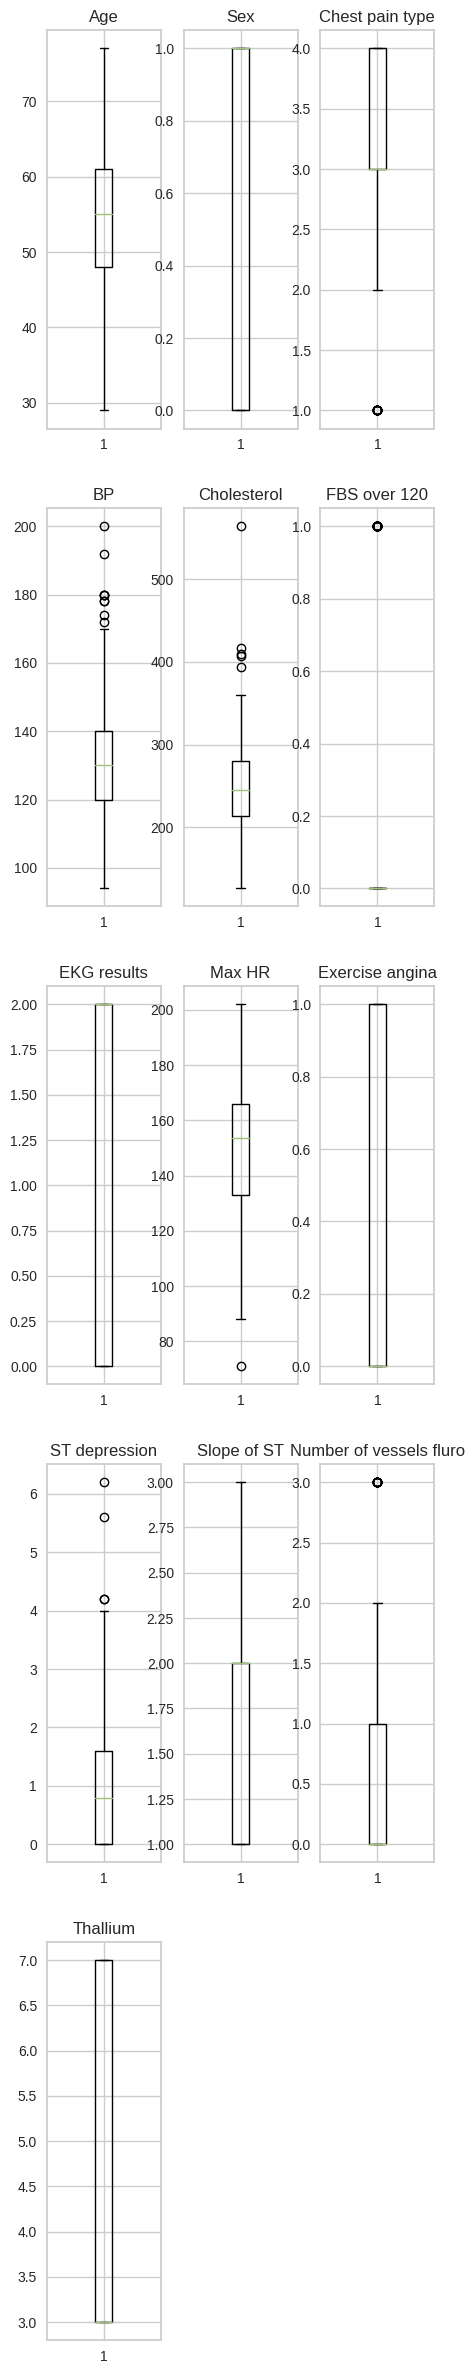

In [23]:

#plot the variables to check for outliers
fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(5,30))

# Flatten the axs array to simplify indexing
axs = axs.flatten()

for i, feature in enumerate(features_variables.columns):
    axs[i].boxplot(features_variables[feature])
    axs[i].set_title(feature)

        # Remove any unused subplots
for j in range(len(features_variables.columns), len(axs)):
    fig.delaxes(axs[j])



            # Display the plot
plt.show()

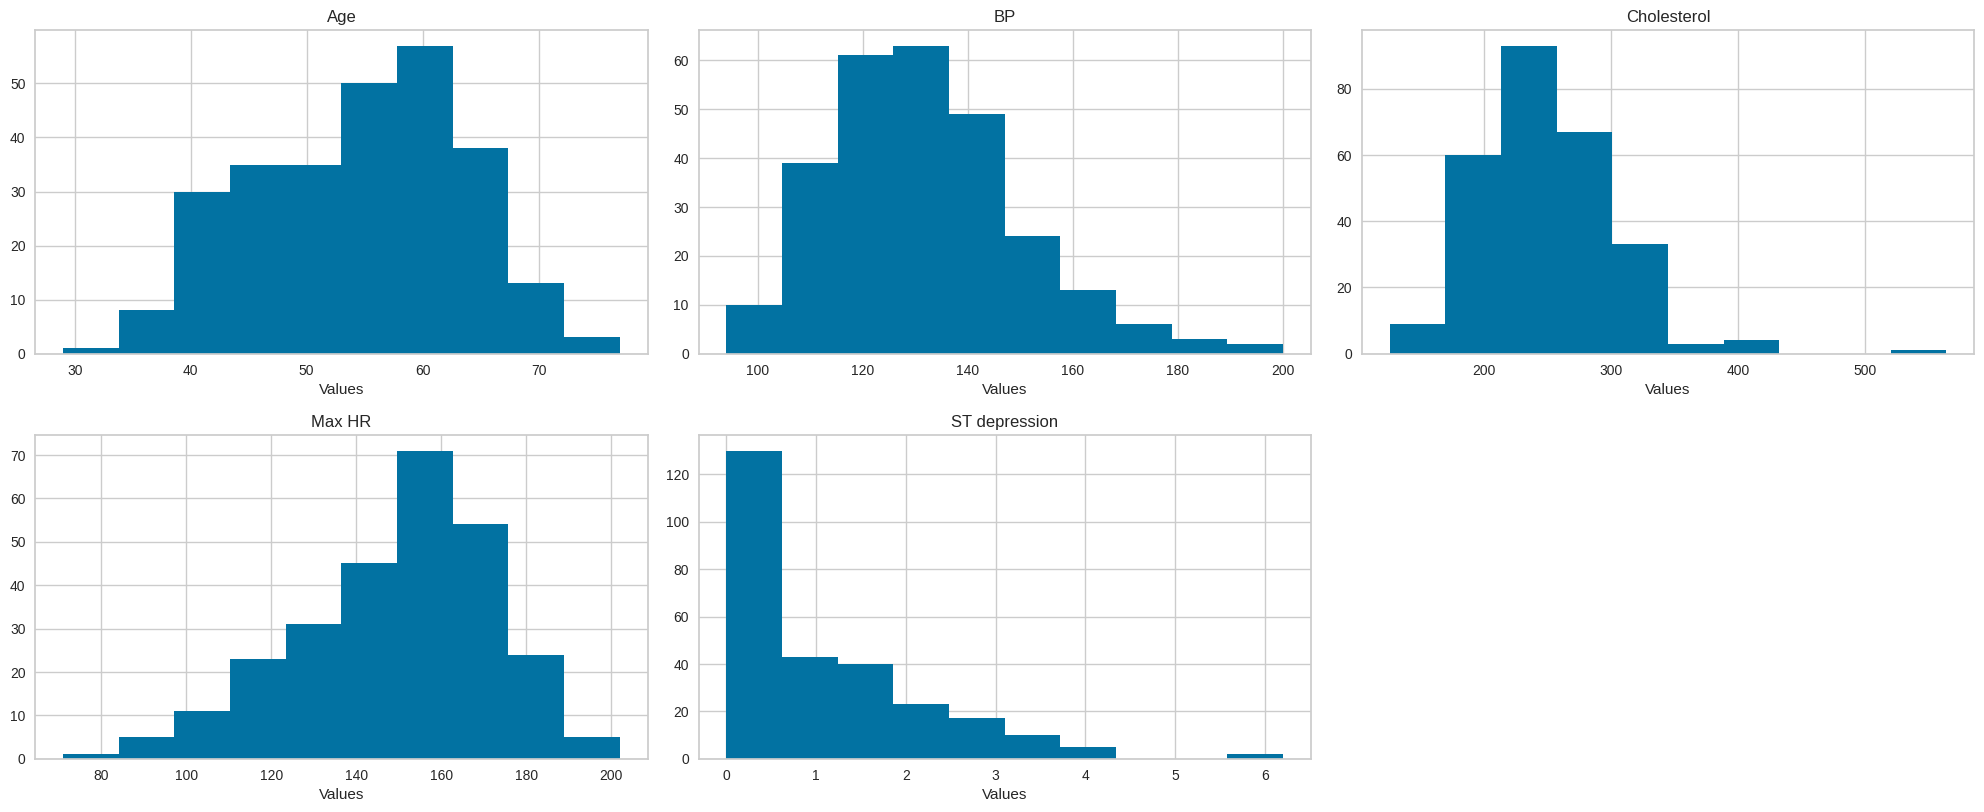

In [24]:
hist_variables = health_data.iloc[:,[0,3,4,7,9]]
fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(20, 20))

# Flatten the axs array to simplify indexing
axs = axs.flatten()

for i, feature in enumerate(hist_variables.columns):
    axs[i].hist(hist_variables[feature])
    axs[i].set_title(feature)
    axs[i].set_xlabel('Values')

            # Remove any unused subplots
for j in range(len(hist_variables.columns), len(axs)):
    fig.delaxes(axs[j])

                # Adjust spacing between subplots
fig.tight_layout()

                # Display the plot
plt.show()

In [26]:
alpha = 0.05 #set significance level
for column in hist_variables.columns:
    column_data = hist_variables[column]
    statistic, p_value = shapiro(column_data)
            #print the test result for the current column
    print("Column:", column)
    print("Statistic:", statistic)
    print("p_value:", p_value)

                                #check for normality per column
    if (p_value < alpha):
        print("The data does not follow normal distribution")
    else:
        print("The data follows normal distribution")
    print()

Column: Age
Statistic: 0.9882946610450745
p_value: 0.02765394188463688
The data does not follow normal distribution

Column: BP
Statistic: 0.9649232625961304
p_value: 3.7402976431621937e-06
The data does not follow normal distribution

Column: Cholesterol
Statistic: 0.9433528780937195
p_value: 1.0786085802294565e-08
The data does not follow normal distribution

Column: Max HR
Statistic: 0.9756816625595093
p_value: 0.00014500865654554218
The data does not follow normal distribution

Column: ST depression
Statistic: 0.8515622615814209
p_value: 2.102865382435444e-15
The data does not follow normal distribution



<Axes: xlabel='Heart Disease', ylabel='count'>

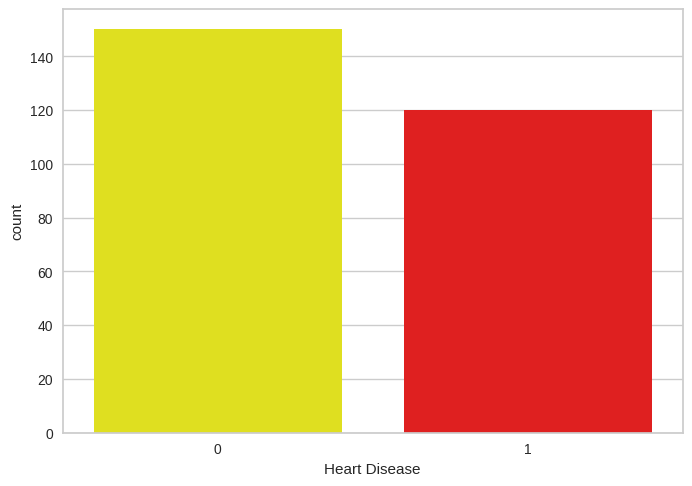

In [29]:
sns.countplot(x = outcome_variable, data = health_data, palette=['yellow', 'red'])

In [30]:
noncat_variables = health_data.iloc[:,[1,2,5,6,8,10,11,12]]
noncat_variables

,Sex,Chest pain type,FBS over 120,EKG results,Exercise angina,Slope of ST,Number of vessels fluro,Thallium
0,1,4,0,2,0,2,3,3
1,0,3,0,2,0,2,0,7
2,1,2,0,0,0,1,0,7
3,1,4,0,0,1,2,1,7
4,0,2,0,2,1,1,1,3
...,...,...,...,...,...,...,...,...
265,1,3,1,0,0,1,0,7
266,1,2,0,0,0,1,0,7
267,0,2,0,2,0,2,0,3
268,1,4,0,0,0,2,0,6


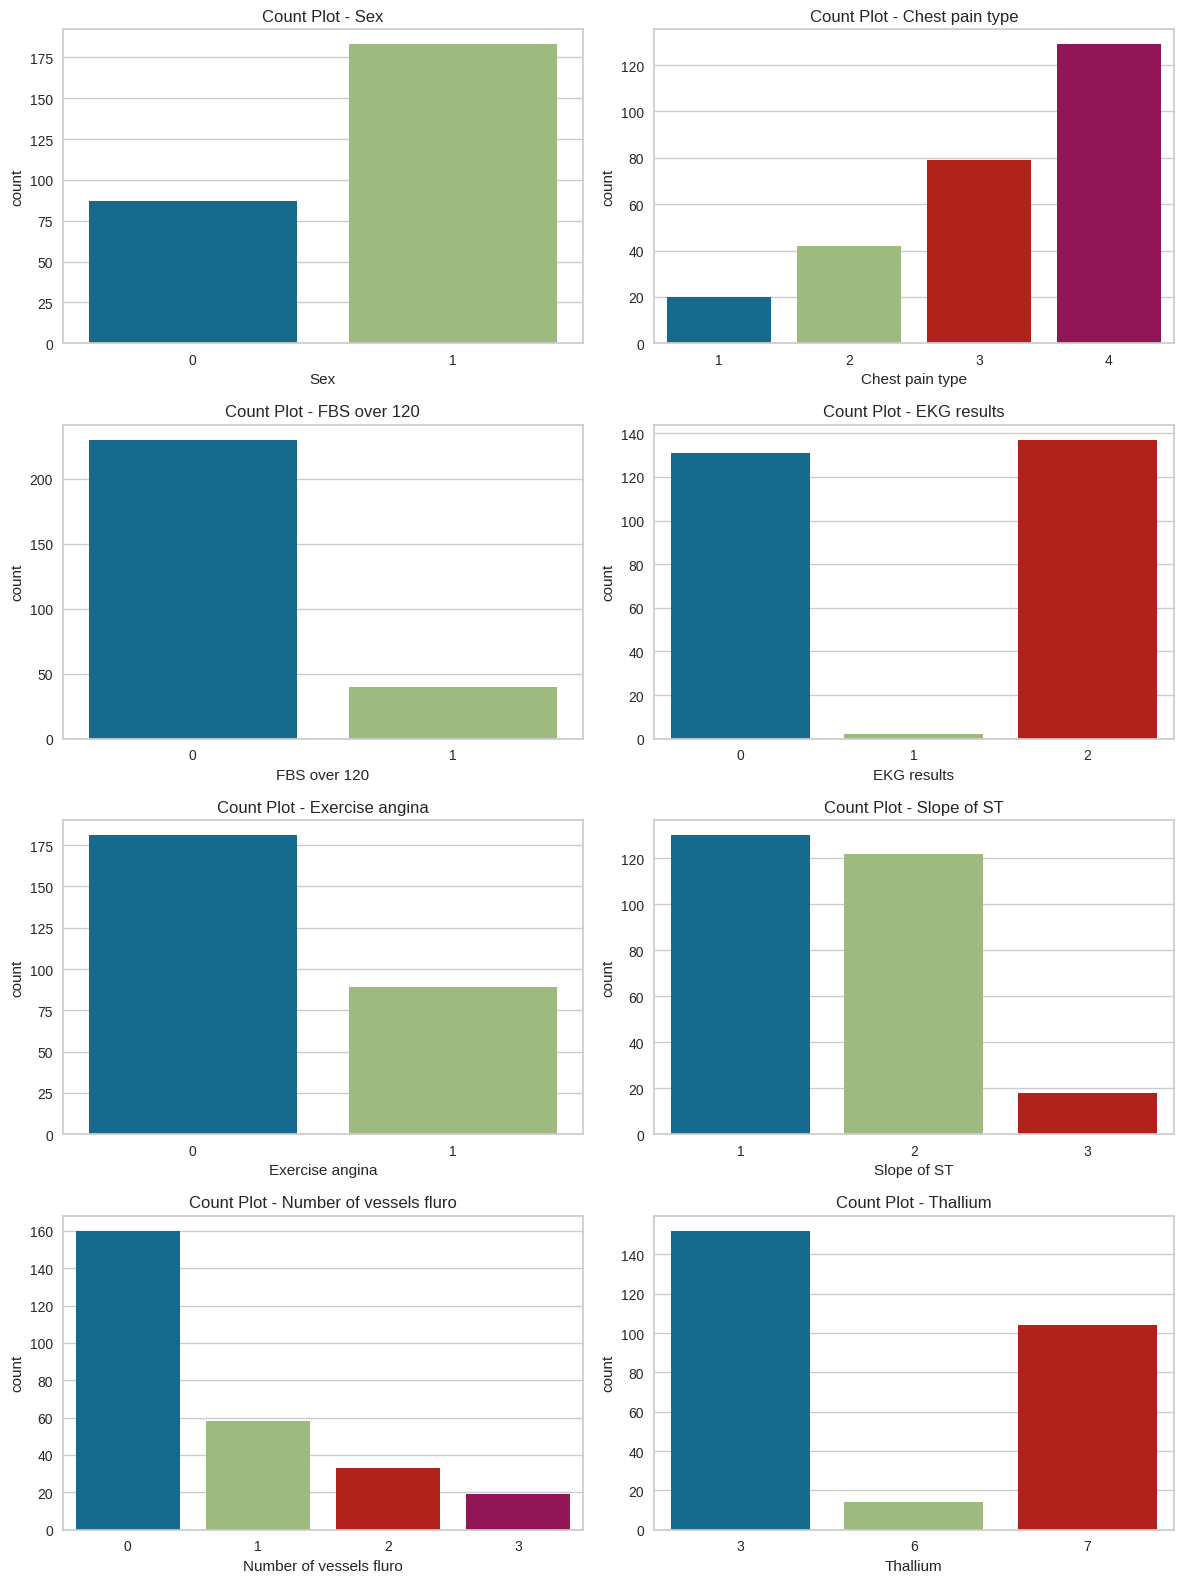

In [31]:
num_columns = len(noncat_variables.columns)
num_rows = (num_columns // 2) + (num_columns % 2)
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, num_rows * 4))

# Iterate over the columns and plot count plots
for i, column in enumerate(noncat_variables.columns):
    row = i // 2
    col = i % 2
    sns.countplot(x=column, data=health_data, ax=axes[row, col])
    axes[row, col].set_title(f'Count Plot - {column}')

                # Remove any empty subplots
if num_columns % 2 != 0:
   fig.delaxes(axes[num_rows-1, 1])

                    # Adjust subplot spacing






plt.tight_layout()

                    # Display the plot
plt.show()

In [36]:
X = health_data.iloc[:, :-1]  # Select all columns except the last one
y = health_data.iloc[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (optional but recommended for deep learning)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a deep learning model using TensorFlow and Keras
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
            ])

            # Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

            # Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

            # Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

Epoch 1/50
7/7 [==============================] - 3s 82ms/step - loss: 0.6791 - accuracy: 0.5556 - val_loss: 0.5894 - val_accuracy: 0.8148
Epoch 2/50
7/7 [==============================] - 0s 17ms/step - loss: 0.5533 - accuracy: 0.7685 - val_loss: 0.5058 - val_accuracy: 0.8704
Epoch 3/50
7/7 [==============================] - 0s 24ms/step - loss: 0.4690 - accuracy: 0.8148 - val_loss: 0.4458 - val_accuracy: 0.8519
Epoch 4/50
7/7 [==============================] - 0s 15ms/step - loss: 0.4132 - accuracy: 0.8333 - val_loss: 0.4037 - val_accuracy: 0.8519
Epoch 5/50
7/7 [==============================] - 0s 14ms/step - loss: 0.3802 - accuracy: 0.8426 - val_loss: 0.3753 - val_accuracy: 0.8519
Epoch 6/50
7/7 [==============================] - 0s 18ms/step - loss: 0.3527 - accuracy: 0.8611 - val_loss: 0.3587 - val_accuracy: 0.8519
Epoch 7/50
7/7 [==============================] - 0s 15ms/step - loss: 0.3369 - accuracy: 0.8704 - val_loss: 0.3492 - val_accuracy: 0.8519
Epoch 8/50
7/7 [===========

In [38]:
y_pred = pipe.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [40]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6111111111111112


In [41]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
cm

array([[33,  0],
       [21,  0]])

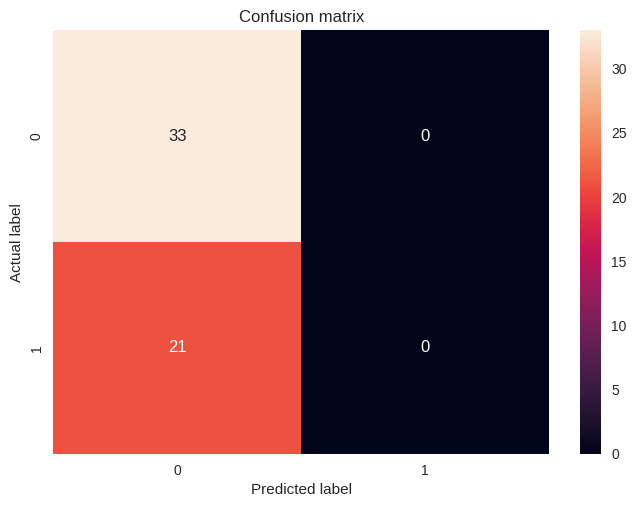

In [42]:
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(["red", "black"])
class_names=[1,0] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(cm, annot=True ,fmt='g')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix')
plt.show()

In [43]:
target_names = ['Presence', 'Absence']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    Presence       0.61      1.00      0.76        33
     Absence       0.00      0.00      0.00        21

    accuracy                           0.61        54
   macro avg       0.31      0.50      0.38        54
weighted avg       0.37      0.61      0.46        54



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
